In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
 
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE= 256
BATCH_SIZE=32
Epochs= 10
CHANNELS=3

In [3]:
    dataset=tf.keras.preprocessing.image_dataset_from_directory(
        "plantimage",
        shuffle= True,
        image_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )

    class_names= dataset.class_names

Found 2152 files belonging to 3 classes.


In [4]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch,label_batch in dataset.take(0):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [6]:
train_size= 0.8
len(dataset)*train_size

54.400000000000006

In [7]:
test_ds= dataset.take(54)
len(test_ds)

54

In [8]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [9]:
val_size= 0.1
len(dataset)*val_size

6.800000000000001

In [10]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [11]:
val_ds= test_ds.skip(6)
len(val_ds)


8

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8, test_split=0.1,val_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size= len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)
    
    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds= ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [13]:
train_ds,val_ds,test_ds= get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

54

In [15]:
len(val_ds)

6

In [16]:
len(test_ds)

8

In [17]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [20]:
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu' ),
    layers.Dense(n_classes, activation= 'softmax'),
    
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [22]:
model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [23]:
history=model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data= val_ds
)

Epoch 1/10
54/54 [==============================] - 145s 2s/step - loss: 0.8957 - accuracy: 0.4930 - val_loss: 0.7689 - val_accuracy: 0.6198
Epoch 2/10
54/54 [==============================] - 129s 2s/step - loss: 0.5949 - accuracy: 0.7248 - val_loss: 0.3563 - val_accuracy: 0.8512
Epoch 3/10
54/54 [==============================] - 151s 3s/step - loss: 0.2856 - accuracy: 0.8825 - val_loss: 0.2539 - val_accuracy: 0.8958
Epoch 4/10
54/54 [==============================] - 139s 3s/step - loss: 0.3007 - accuracy: 0.8715 - val_loss: 0.2881 - val_accuracy: 0.8594
Epoch 5/10
54/54 [==============================] - 134s 2s/step - loss: 0.2343 - accuracy: 0.9208 - val_loss: 0.3523 - val_accuracy: 0.8854
Epoch 6/10
54/54 [==============================] - 137s 2s/step - loss: 0.1768 - accuracy: 0.9296 - val_loss: 0.2719 - val_accuracy: 0.8958
Epoch 7/10
54/54 [==============================] - 141s 3s/step - loss: 0.2116 - accuracy: 0.9190 - val_loss: 0.4420 - val_accuracy: 0.8750
Epoch 8/10
54

In [24]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 351ms/step - loss: 0.1195 - accuracy: 0.9375


In [25]:
scores

[0.11954409629106522, 0.9375]

In [26]:
history

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

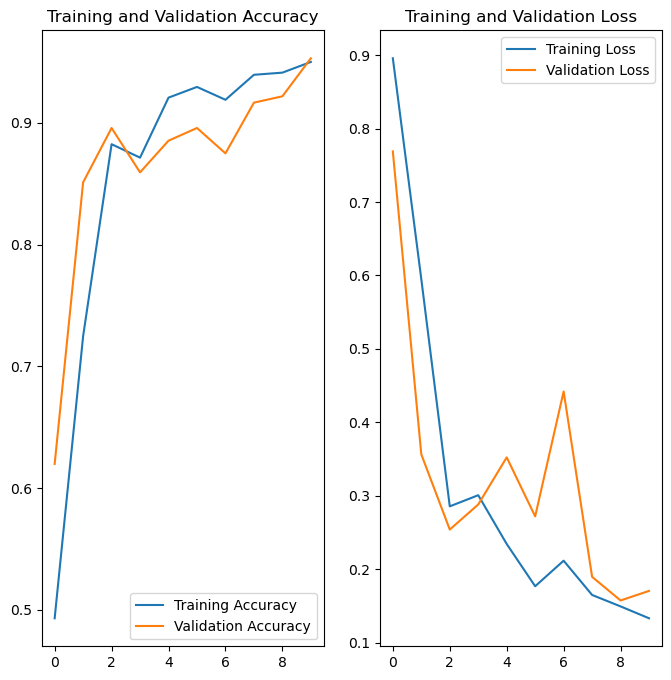

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 614ms/step
predicted label: Potato___Late_blight


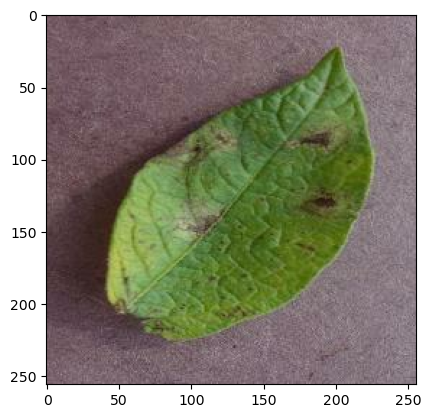

In [30]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 40ms/step


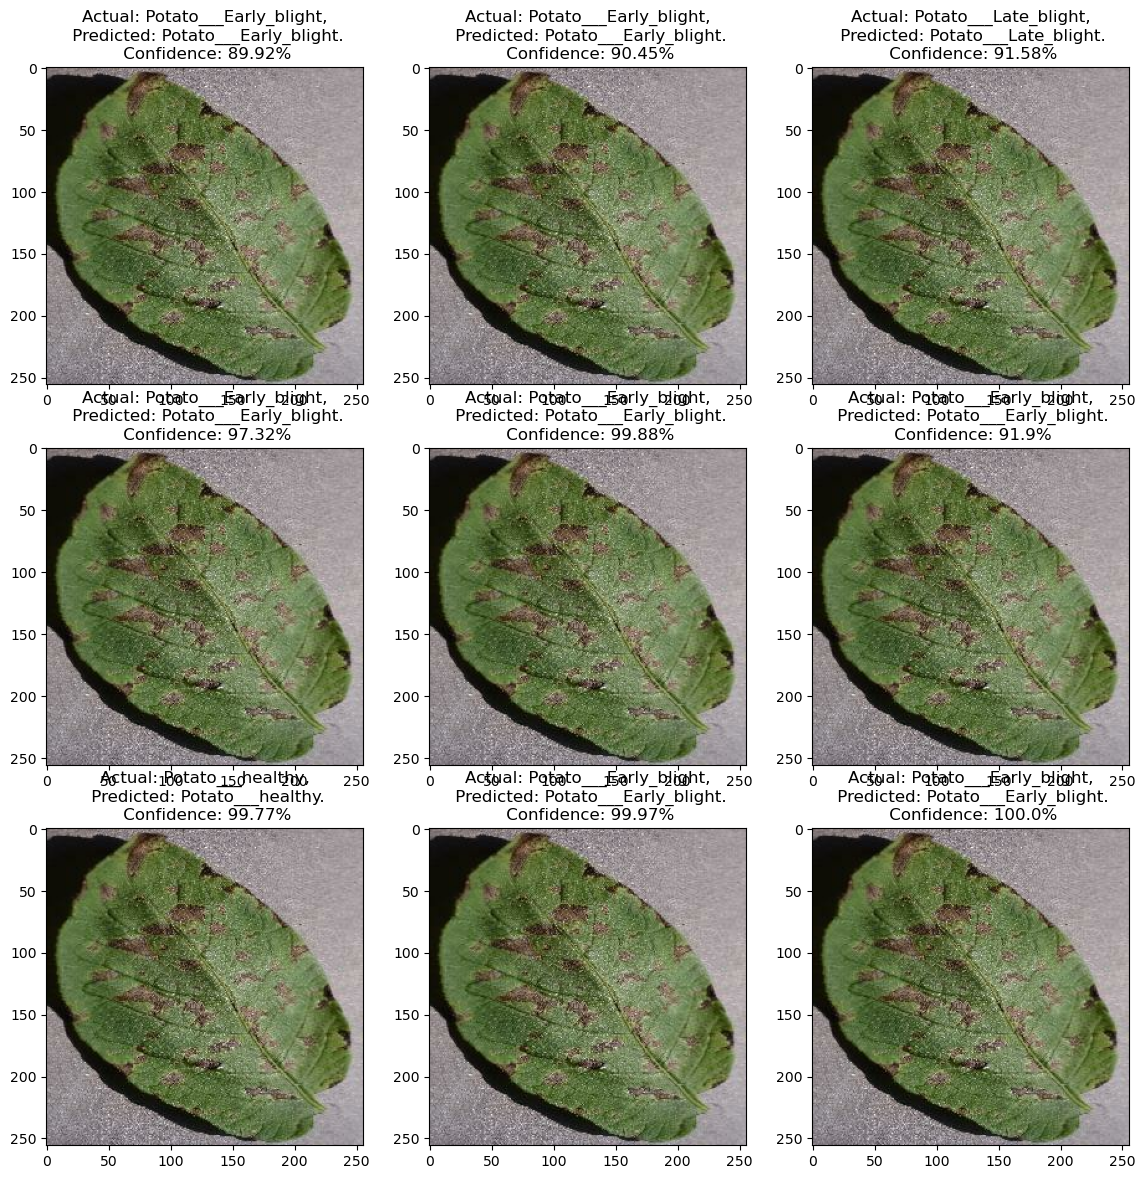

In [32]:
plt.figure(figsize=(14,14))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[1].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis=0

In [33]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [34]:
model.save("../potatoes.h5")